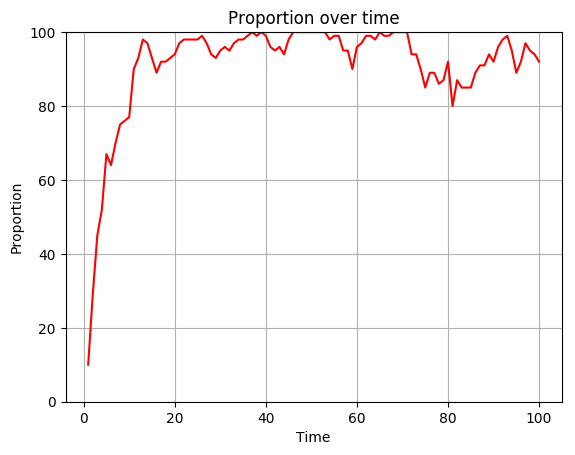

100-element Array{Float64,1}:
 10.0
 29.0
 45.0
 52.0
 67.0
 64.0
 70.0
 75.0
 76.0
 77.0
 90.0
 93.0
 98.0
  ⋮  
 94.0
 92.0
 96.0
 98.0
 99.0
 95.0
 89.0
 92.0
 97.0
 95.0
 94.0
 92.0

In [17]:
using PyPlot

function nextGeneration(vector, proportion)
    """Returns the new vector of population and its characteristic, 
    using the vector of the old generation and its characteristic."""
    newProportion = 0
    for i in 1:length(vector)
        # rand() gives a number in (0,1). Simulation of a random variable following a Bernoulli distribution
        # of parameter "proportion/populationSize"
        if rand() > proportion/length(vector)
            vector[i] = 0
        else
            vector[i] = 1
            newProportion += 1
        end
    end
    return vector, newProportion
end

function mutations(vector, proportion, probability0to1, probability1to0)
    """Applying the mutations for a generation giver by its vector and its characteristic.
    probability0to1 is a fixed (float) number between 0 and 1 that represented the transition probability from 0 to 1.
    probability1to0 is a fixed (float) number between 0 and 1 that represented the transition probability from 1 to 0."""
    
    for j in 1:length(vector)
        if vector[j] == 0
            if rand() <= probability0to1
                vector[j] = 1
                proportion += 1
            end
        else
            if rand() <= probability1to0
                vector[j] = 0
                proportion -= 1
            end
        end
    end
    
    return vector, proportion
end

function nextGenerationMutations(vector, proportion, probability0to1, probability1to0)
    """Returns the new vector of population and its characteristic, 
    using the vector of the old generation and its characteristic after applying mutations given by the two 
    transition probabilities probability0to1 and probability1to0."""
    
    #Applying the mutations
    vectorAfterMutations, proportionAfterMutations = mutations(vector, proportion, probability0to1, probability1to0) 
    
    #Producing the next generation
    return nextGeneration(vectorAfterMutations, proportionAfterMutations)
end

function trajectory_mutations(populationSize, initialProportion, probability0to1, 
        probability1to0, finalTime, booleanPlot)
    """Run the Wright-Fisher algorithm with mutations. Returns the list of proportions over time (for now).
    finalTime is how many iterations you do.
    booleanPlot : true if you want to plot the trajectory, false if you do not."""
    
    populationVector = zeros(populationSize)
    listOfProportions = Float64[]
    
    # Initializing the population
    for i in 1:length(populationVector)
        if i > initialProportion
            populationVector[i] = 0
        else
            populationVector[i]
        end
    end
    
    currentProportion = initialProportion
    
    # First proportion added to the plot
    push!(listOfProportions, currentProportion)

    for time in 2:finalTime
        
        populationVector, currentProportion = nextGenerationMutations(populationVector, currentProportion,
        probability0to1, probability1to0)
        
        # Adding the proportion to the plot
        push!(listOfProportions, currentProportion)
    end

    
    # Plot
    if (booleanPlot)
        ioff()

        listOfTimes = collect(1:finalTime)

        title("Proportion over time")
        xlabel("Time")
        ylabel("Proportion")
        ylim(0,populationSize)
        grid(true)

        plot(listOfTimes, listOfProportions, color="red")
    end
    
    return listOfProportions
end

trajectory_mutations(100, 10, 0.15, 0.01, 100, true)